오피넷 유가정보 셀레니움으로 크롤링하기(jupyter notebook방식)  
두개정도로 나눠서 할 수 있다(한번에 해도 됨)
# 셀프주유소는 정말 저렴할까?

In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [2]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window() #주석처리하면.. 페이지가 안나와서 못눌러;; 그래서 꼭 해줘야함
driver.get('http://www.opinet.co.kr/searRgSelect.do')
time.sleep(1) 

#싼주유소찾기 페이지주소를 넣었는데도 안간다;; 그래서 퀵메뉴에서 클릭해보는걸로
#quick 원하는 포인트 찾아서 클릭만해주면 됨 (변수에넣을필요없다)
driver.find_element_by_css_selector('.ic_m1').click()
time.sleep(2)       #안넣으면 너무 빨라서 또 에러나는 경우가있으니 2초정도 넣어준다;

region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
#region = driver.find_element_by_id("SIGUNGU_NM") #이것과 같다 
gu_list = region.find_elements_by_tag_name('option')
#옵션의 구리스트를 구네임즈로 만듦 gu_names = []

gu_names = [gu.get_attribute('value') for gu in gu_list]  #파이썬다운코드(한줄로줄임)
''' gu_names = []
for gu in gu_list:
    name = gu.get_attribute('value')
    gu_names.append(name) '''
del gu_names[0] # 첫줄에 내용없는것 삭제 

In [3]:
# 25개 자치구에 대해서 엑셀다운로드(루핑) 위복붙
for gu in gu_names:
    region = driver.find_element_by_id('SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)
    #엑셀 0~24까지 25개 저장 확인완

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=87.0.4280.66)


In [4]:
driver.quit() #그냥 마지막으로 꼭 해주는거ㅋ

## 구별 주유가격에 대한(엑셀) 데이터정리

In [5]:
import pandas as pd 
from glob import glob

In [6]:
glob('./station_data/지역*.xls')  #25개 파일들이 한개의 데이터프레임으로 묶어서 작업하려고glob()

['./station_data\\지역_위치별(주유소) (1).xls',
 './station_data\\지역_위치별(주유소) (10).xls',
 './station_data\\지역_위치별(주유소) (11).xls',
 './station_data\\지역_위치별(주유소) (12).xls',
 './station_data\\지역_위치별(주유소) (13).xls',
 './station_data\\지역_위치별(주유소) (14).xls',
 './station_data\\지역_위치별(주유소) (15).xls',
 './station_data\\지역_위치별(주유소) (16).xls',
 './station_data\\지역_위치별(주유소) (17).xls',
 './station_data\\지역_위치별(주유소) (18).xls',
 './station_data\\지역_위치별(주유소) (19).xls',
 './station_data\\지역_위치별(주유소) (2).xls',
 './station_data\\지역_위치별(주유소) (20).xls',
 './station_data\\지역_위치별(주유소) (21).xls',
 './station_data\\지역_위치별(주유소) (22).xls',
 './station_data\\지역_위치별(주유소) (23).xls',
 './station_data\\지역_위치별(주유소) (24).xls',
 './station_data\\지역_위치별(주유소) (3).xls',
 './station_data\\지역_위치별(주유소) (4).xls',
 './station_data\\지역_위치별(주유소) (5).xls',
 './station_data\\지역_위치별(주유소) (6).xls',
 './station_data\\지역_위치별(주유소) (7).xls',
 './station_data\\지역_위치별(주유소) (8).xls',
 './station_data\\지역_위치별(주유소) (9).xls',
 './station_data\\지역_위치별(

In [7]:
#일단 하나 찍어보자 
df = pd.read_excel('./station_data/지역_위치별(주유소).xls', header=2) #헤더2개날리고 컬럼명 잘 들어갔나~_~
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1355,1155,-
1,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1537,1359,1154,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1547,1363,1159,-
3,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1373,1185,-
4,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1562,1378,1174,1070


In [8]:
#엑셀하나 열어보면 1.2줄은 날려야하는거, 3줄이 컬럼명, 그 아래들이 데이터
station_files = glob('./station_data/지역*.xls')
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw) #파일하나로 합쳐짐concat

In [9]:
#합쳐진것 확인 498entries
station_raw.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      498 non-null    object
 1   상호      498 non-null    object
 2   주소      498 non-null    object
 3   상표      498 non-null    object
 4   전화번호    498 non-null    object
 5   셀프여부    498 non-null    object
 6   고급휘발유   498 non-null    object
 7   휘발유     498 non-null    object
 8   경유      498 non-null    object
 9   실내등유    498 non-null    object
dtypes: object(10)
memory usage: 42.8+ KB


In [10]:
#185p.  엑셀자료중' 상호 주소 상표 셀프여부 휘발유' 5가지칼럼으로 만든다.
stations = pd.DataFrame({
    '상호': station_raw['상호'],
    '주소': station_raw['주소'],
    '가격': station_raw['휘발유'],
    '셀프': station_raw['셀프여부'],
    '상표': station_raw['상표']
})
stations.head()

,상호,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1374,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1385,N,GS칼텍스
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1386,Y,현대오일뱅크
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1395,Y,SK에너지
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1395,Y,현대오일뱅크


In [11]:
#'구'컬럼을 추가로 만드는데 주소에서 스플릿을해서 첫번째부분을 적용
stations['구'] = [addr.split()[1] for addr in stations['주소']]
stations.tail()  #한번 테일로보니까.. (휘발유)가격이 없는곳도 있네..  
#엑셀은 100만줄까지만가능.. 판다스는 더 많은 데이터도 가능하다.(그래서 판다스 쓰시오)

,상호,주소,가격,셀프,상표,구
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1883,N,GS칼텍스,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1913,N,GS칼텍스,강남구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [12]:
#유니크한 값이 몇개있나? 확인하니 25개나옴. 더이상 구에대해서 정리안해도되겠다~_~
stations['구'].unique()  

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [13]:
#가격 - 이 표시인곳은 빼자
stations = stations[stations['가격'] != '-']
stations.info()  
#498개중 487만 남았다 11개정도 정리한듯 ㅎㅎ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      487 non-null    object
 1   주소      487 non-null    object
 2   가격      487 non-null    object
 3   셀프      487 non-null    object
 4   상표      487 non-null    object
 5   구       487 non-null    object
dtypes: object(6)
memory usage: 26.6+ KB


In [14]:
# 가격컬럼의 타입. 스트링에서 인트로 바꾸자
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()
#  2   가격      487 non-null    int64  인트64부분 확인완

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      487 non-null    object
 1   주소      487 non-null    object
 2   가격      487 non-null    int64 
 3   셀프      487 non-null    object
 4   상표      487 non-null    object
 5   구       487 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.6+ KB


## 4-4셀프주유소가 정말 저렴한지 Boxplot으로 확인하기

In [15]:
import seaborn as sns           #04.Visual폴더 04_seaborn에 있는거 가져옴
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

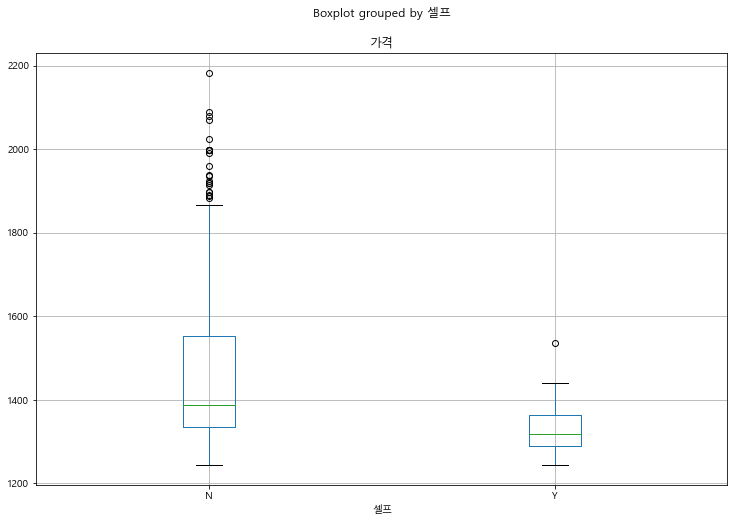

In [16]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))
#셀프주유소가 저렴해보이나.. 그렇지않다(가설검정)
#                               H0 차이가없다 귀무가설
#                               H1 차이가있다 대립가설
# T분포로 판단 ;;;;;

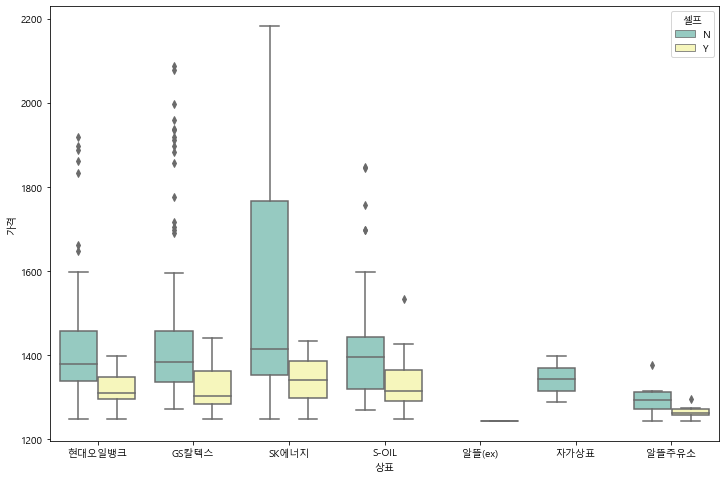

In [17]:
#시본에 있는 박스플롯으로 
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

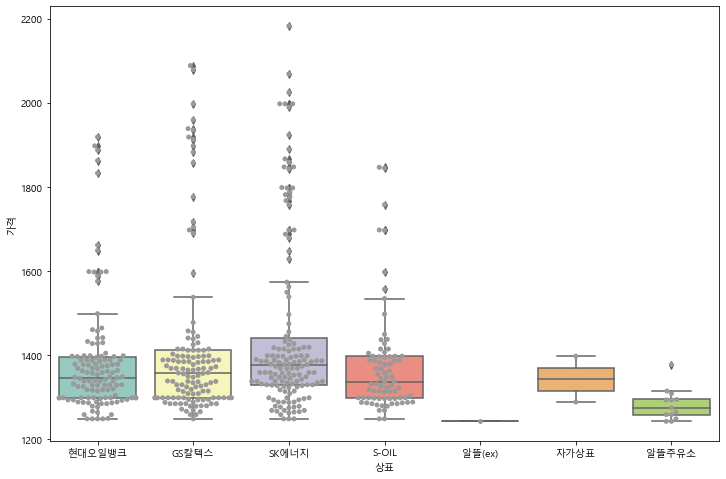

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show

## 4-5서울시 구별 휘발유 가격 확인

In [19]:
import json
import folium  #pip install folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
# 휘발유가격이 비싼 주유소 (상위가격 소팅 ) ascending=False비싼주유소 Top10
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2183,N,SK에너지,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2089,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2079,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069,N,SK에너지,중구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
12,한남지점,서울 용산구 한남대로21길 4 (한남동),1998,N,SK에너지,용산구
7,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998,N,GS칼텍스,종로구
8,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998,N,SK에너지,종로구
11,에너비스,서울 용산구 한남대로 82 (한남동),1998,N,SK에너지,용산구
10,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990,N,SK에너지,용산구


In [21]:
# 휘발유가격이 저렴한 주유소 (상위가격 소팅 ) ascending=True 저렴한 주유소 Top10
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
0,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,알뜰주유소,강서구
1,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1243,N,알뜰주유소,강서구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1244,Y,알뜰(ex),서초구
1,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1249,Y,SK에너지,도봉구
3,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1249,N,SK에너지,양천구
2,현대주유소,서울 양천구 남부순환로 372 (신월동),1249,Y,S-OIL,양천구
1,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1249,Y,SK에너지,양천구
0,형산석유(주)원주유소,서울 양천구 남부순환로 408,1249,N,현대오일뱅크,양천구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1249,Y,현대오일뱅크,강북구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1249,N,현대오일뱅크,도봉구


In [22]:
import numpy as np
#그룹바이와 같다 gu_data = stations['가격'].groupby(stations['구']).mean()
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1541.052632
강동구,1442.500000
강북구,1281.153846
강서구,1340.090909
관악구,1384.125000


In [23]:
gu_data2 = stations['가격'].groupby(stations['구']).mean()
gu_data2

구
강남구     1541.052632
강동구     1442.500000
강북구     1281.153846
강서구     1340.090909
관악구     1384.125000
광진구     1341.470588
구로구     1363.681818
금천구     1304.461538
노원구     1371.785714
도봉구     1314.777778
동대문구    1337.190476
동작구     1372.600000
마포구     1460.250000
서대문구    1334.666667
서초구     1439.823529
성동구     1428.941176
성북구     1290.416667
송파구     1371.515152
양천구     1335.153846
영등포구    1440.933333
용산구     1820.214286
은평구     1326.437500
종로구     1701.333333
중구      1841.600000
중랑구     1301.875000
Name: 가격, dtype: float64

In [24]:
#폴리움에 있는 부분 지도로 표현
geo_path = './skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,
                data = gu_data,
                columns=[gu_data.index, '가격'],
                fill_color='PuRd', 
                key_on='feature.id')
map

In [25]:
## 겹치는 인덱스가 있어서 인덱스를 리셋해서 새로 정렬 (승모코드)
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)  # 내림차순 비싼것부터~
oil_price_top10 = oil_price_top10.reset_index(drop=True)
oil_price_bottom10 = stations.sort_values(by='가격').head(10)        # ascending=True 오름차순(생략가능) 저렴이부터~ 
oil_price_bottom10 = oil_price_bottom10.reset_index(drop=True)

In [26]:
# 인덱스 리셋된것 확인 top10
oil_price_top10

,상호,주소,가격,셀프,상표,구
0,서남주유소,서울 중구 통일로 30,2183,N,SK에너지,중구
1,서계주유소,서울 용산구 청파로 367 (서계동),2089,N,GS칼텍스,용산구
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2079,N,GS칼텍스,중구
3,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069,N,SK에너지,중구
4,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
5,한남지점,서울 용산구 한남대로21길 4 (한남동),1998,N,SK에너지,용산구
6,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998,N,GS칼텍스,종로구
7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998,N,SK에너지,종로구
8,에너비스,서울 용산구 한남대로 82 (한남동),1998,N,SK에너지,용산구
9,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990,N,SK에너지,용산구


In [27]:
# 인덱스 리셋된것 확인bottom10
oil_price_bottom10 

,상호,주소,가격,셀프,상표,구
0,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,알뜰주유소,강서구
1,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1243,N,알뜰주유소,강서구
2,만남의광장주유소,서울 서초구 양재대로12길 73-71,1244,Y,알뜰(ex),서초구
3,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1249,Y,SK에너지,도봉구
4,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1249,N,SK에너지,양천구
5,현대주유소,서울 양천구 남부순환로 372 (신월동),1249,Y,S-OIL,양천구
6,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1249,Y,SK에너지,양천구
7,형산석유(주)원주유소,서울 양천구 남부순환로 408,1249,N,현대오일뱅크,양천구
8,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1249,Y,현대오일뱅크,강북구
9,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1249,N,현대오일뱅크,도봉구


## 4-6 카카오맵API써서 해보기 195p.

In [28]:
oil_price_top10['주소']

0               서울 중구 통일로 30
1       서울 용산구 청파로 367 (서계동)
2      서울 중구  퇴계로 196 (필동2가)
3       서울 중구 퇴계로 228 (필동2가)
4       서울 강남구 언주로 716 (논현동)
5     서울 용산구 한남대로21길 4 (한남동)
6        서울 종로구 사직로 65 (사직동)
7           서울 종로구 창경궁로35길 1
8       서울 용산구 한남대로 82 (한남동)
9    서울 용산구 한강대로104길 6 (동자동)
Name: 주소, dtype: object

In [29]:
oil_price_top10['주소'][0]

'서울 중구 통일로 30'

In [30]:
from urllib.parse import urlparse
import requests

In [31]:
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [32]:
oil_price_top10['주소'][0]

'서울 중구 통일로 30'

In [33]:
lat_list =[] ; lng_list = [] 
for i in range(len(oil_price_top10)):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + oil_price_top10['주소'][i]
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['address']['y'])
    lng = float(result['documents'][0]['address']['x'])
    lat_list.append(lat)
    lng_list.append(lng)

oil_price_top10['lat'] = lat_list
oil_price_top10['lng'] = lng_list

In [34]:

lat_list =[] ; lng_list = [] 
for i in range(len(oil_price_bottom10)):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + oil_price_bottom10['주소'][i]
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['address']['y'])
    lng = float(result['documents'][0]['address']['x'])
    lat_list.append(lat)
    lng_list.append(lng)

oil_price_bottom10['lat'] = lat_list
oil_price_bottom10['lng'] = lng_list

In [35]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in range(len(oil_price_top10)) :
    folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],radius=15, color = '#cd3181', fill_color = '#CD3181').add_to(map)

for n in oil_price_bottom10.index:
    folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]], radius=15, color= '#3186cc', fill_color = '#3186cc').add_to(map)

map